<a href="https://colab.research.google.com/github/pahrul23/pahrul-skripsi/blob/main/PERHITUNGAN_SOFT_VOTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD** **DAN** **PREPROCESSING** **DATA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
W2v_df_dataTraining = pd.read_csv('drive/MyDrive/Wira/Word2Vec.csv', encoding="ISO-8859-1")

In [29]:
W2v_df_dataTraining

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.589647,-0.032969,1.577858,-0.261099,-0.816928,1.169729,-0.045591,0.105004,-1.654137,0.374675,...,-1.184555,-0.482295,-1.474492,1.697958,0.375751,0.555185,0.375916,0.981808,-1.704464,2
1,0.169849,-0.948463,-1.936053,0.370609,-0.218172,0.135423,1.503564,-0.821239,0.996892,-1.880665,...,0.341622,-0.482107,0.355359,-0.834764,0.591695,-1.615025,-1.132158,0.398693,0.635384,1
2,0.049207,-0.055259,1.162899,0.103344,-0.585705,0.272081,-0.464852,0.505787,-0.900250,0.626195,...,-0.431760,0.167611,-0.705386,1.139312,0.352743,0.562127,0.703678,0.562917,-0.809697,2
3,0.049207,-0.055259,1.162899,0.103344,-0.585705,0.272081,-0.464852,0.505787,-0.900250,0.626195,...,-0.431760,0.167611,-0.705386,1.139312,0.352743,0.562127,0.703678,0.562917,-0.809697,2
4,0.284075,0.624841,0.282875,-0.772059,0.575722,0.398152,-0.181389,-0.392350,-0.220285,0.273051,...,-0.438284,-0.567406,0.195598,-0.231363,-0.827963,0.422755,-0.221953,-0.709832,-0.015067,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,1.421210,3.128096,0.114922,-2.611097,3.436417,-1.410561,-0.976095,-1.382296,0.751334,1.908477,...,0.470704,0.420560,1.974974,-2.383461,-3.285148,2.407402,-1.522504,-3.361125,1.637426,1
17636,-2.929913,-1.509963,-1.346306,1.939351,-0.224151,-1.337806,-1.937517,2.330764,2.523358,0.509626,...,2.653045,2.623997,2.299301,-1.443935,1.025284,-1.089208,2.151263,-0.149006,2.373927,1
17637,-0.958356,-0.204796,-0.415086,0.642472,0.206285,-0.827741,-0.794551,0.744620,0.938180,0.443751,...,0.945847,0.975964,0.969092,-0.477760,0.025019,-0.080705,0.633886,-0.314003,0.856739,1
17638,0.524655,-1.013381,-2.308306,0.158416,-0.202552,0.506964,2.059501,-1.338397,1.018989,-2.423215,...,0.114741,-0.998798,0.224538,-0.922002,0.580955,-1.963623,-1.629168,0.435039,0.590974,1


In [30]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(W2v_df_dataTraining)
W2v_df_dataTraining

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.589647,-0.032969,1.577858,-0.261099,-0.816928,1.169729,-0.045591,0.105004,-1.654137,0.374675,...,-1.184555,-0.482295,-1.474492,1.697958,0.375751,0.555185,0.375916,0.981808,-1.704464,2
1,0.169849,-0.948463,-1.936053,0.370609,-0.218172,0.135423,1.503564,-0.821239,0.996892,-1.880665,...,0.341622,-0.482107,0.355359,-0.834764,0.591695,-1.615025,-1.132158,0.398693,0.635384,1
2,0.049207,-0.055259,1.162899,0.103344,-0.585705,0.272081,-0.464852,0.505787,-0.900250,0.626195,...,-0.431760,0.167611,-0.705386,1.139312,0.352743,0.562127,0.703678,0.562917,-0.809697,2
3,0.049207,-0.055259,1.162899,0.103344,-0.585705,0.272081,-0.464852,0.505787,-0.900250,0.626195,...,-0.431760,0.167611,-0.705386,1.139312,0.352743,0.562127,0.703678,0.562917,-0.809697,2
4,0.284075,0.624841,0.282875,-0.772059,0.575722,0.398152,-0.181389,-0.392350,-0.220285,0.273051,...,-0.438284,-0.567406,0.195598,-0.231363,-0.827963,0.422755,-0.221953,-0.709832,-0.015067,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,1.421210,3.128096,0.114922,-2.611097,3.436417,-1.410561,-0.976095,-1.382296,0.751334,1.908477,...,0.470704,0.420560,1.974974,-2.383461,-3.285148,2.407402,-1.522504,-3.361125,1.637426,1
17636,-2.929913,-1.509963,-1.346306,1.939351,-0.224151,-1.337806,-1.937517,2.330764,2.523358,0.509626,...,2.653045,2.623997,2.299301,-1.443935,1.025284,-1.089208,2.151263,-0.149006,2.373927,1
17637,-0.958356,-0.204796,-0.415086,0.642472,0.206285,-0.827741,-0.794551,0.744620,0.938180,0.443751,...,0.945847,0.975964,0.969092,-0.477760,0.025019,-0.080705,0.633886,-0.314003,0.856739,1
17638,0.524655,-1.013381,-2.308306,0.158416,-0.202552,0.506964,2.059501,-1.338397,1.018989,-2.423215,...,0.114741,-0.998798,0.224538,-0.922002,0.580955,-1.963623,-1.629168,0.435039,0.590974,1


In [31]:
X = W2v_df_dataTraining.drop("label",axis=1).to_numpy()
X

array([[ 0.5896474 , -0.0329686 ,  1.57785791, ...,  0.37591602,
         0.98180843, -1.70446447],
       [ 0.16984885, -0.94846334, -1.93605267, ..., -1.13215766,
         0.39869305,  0.635384  ],
       [ 0.04920737, -0.05525941,  1.16289923, ...,  0.70367819,
         0.56291684, -0.80969728],
       ...,
       [-0.95835596, -0.2047959 , -0.41508558, ...,  0.63388551,
        -0.31400326,  0.85673897],
       [ 0.5246552 , -1.01338077, -2.30830572, ..., -1.62916827,
         0.43503892,  0.59097428],
       [ 0.75952328,  0.62799785, -0.26910375, ..., -0.89697514,
        -0.32716766,  0.057265  ]])

In [32]:
W2v_df_dataTraining['label'].value_counts()

2    7783
1    7736
0    2121
Name: label, dtype: int64

In [ ]:
# W2v_df_dataTraining.to_csv(r'dataBersih.csv', index = False, header = True,index_label=None)

In [33]:
y = W2v_df_dataTraining['label'].to_numpy()
X = W2v_df_dataTraining.drop("label",axis=1).to_numpy()

In [34]:
W2v_df_dataTraining['label'] = pd.to_numeric(W2v_df_dataTraining['label'])

In [35]:
y = W2v_df_dataTraining["label"].to_numpy()
y[0:5]

array([2, 1, 2, 2, 2])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, stratify=y, random_state=30)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14112, 200)
(14112,)
(3528, 200)
(3528,)


# **RANDOM** **FOREST**

In [61]:
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [59]:
clf = RandomForestClassifier(n_estimators=200, max_depth=13, criterion='entropy')
clf.fit(X,y)

predikcld = clf.predict(X_test)

# **XGBOOST**

In [41]:
import xgboost as xgb

In [62]:
# Membuat model XGBoost
model = xgb.XGBClassifier(max_depth=6, n_estimators=200, learning_rate=0.05)
model.fit(X_train, y_train)

# Memprediksi sentimen pada data uji
y_pred = model.predict(X_test)

# **SVM**

In [47]:
from sklearn import svm

In [48]:
svm = svm.SVC(class_weight=None, C=10, gamma=0.001, kernel='linear', random_state=0, probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

# **SOFT** **VOTING**

In [69]:
from sklearn.ensemble import VotingClassifier

# Menggabungkan model dengan VotingClassifier dan menentukan bobot untuk setiap model
voting_clf = VotingClassifier(estimators=[('rf', clf), ('xgb', model), ('svm', svm)],
                              voting='soft', weights=[6.10790141, 5.85306629, 4.02842688])

# Melatih model VotingClassifier
voting_clf.fit(X_train, y_train)

# Membuat prediksi menggunakan model VotingClassifier
y_pred = voting_clf.predict(X_test)

In [70]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.814625850340136


In [71]:
print("Hasil Klasifikasi : \n\n", classification_report(y_test, y_pred))

Hasil Klasifikasi : 

               precision    recall  f1-score   support

           0       0.64      0.29      0.40       424
           1       0.84      0.89      0.86      1547
           2       0.81      0.88      0.85      1557

    accuracy                           0.81      3528
   macro avg       0.76      0.69      0.70      3528
weighted avg       0.80      0.81      0.80      3528



**IMPLEMENTASI** **PSO** **UNTUK** **PERHITUNGAN** **BOBOT**

In [55]:
pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 8.0 MB/s eta 0:00:00


In [56]:
import pyswarms as ps

In [72]:
# Fungsi objektif untuk optimisasi PSO
def objective_function(weights, X_train, y_train, X_test, y_test):
    # Melakukan prediksi probabilitas menggunakan masing-masing model dan bobot
    ensemble = (weights[0] * clf.predict_proba(X_train) + weights[1] * model.predict_proba(X_train) + weights[2] * svm.predict_proba(X_train))
    # Menghitung akurasi menggunakan bobot
    y_pred = np.argmax(ensemble, axis=1)
    accuracy = accuracy_score(y_train, y_pred)
    # Mengembalikan nilai negatif akurasi untuk optimisasi maksimum
    return -accuracy

# Membuat objek optimizer PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options)

# Melakukan optimisasi PSO untuk mendapatkan bobot terbaik
best_cost, best_weights = optimizer.optimize(objective_function, iters=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Menampilkan bobot terbaik dan akurasi model dengan bobot tersebut
print("Bobot terbaik:", best_weights)


# Implementasi bobot ke model soft voting
ensemble = (best_weights[0] * clf.predict_proba(X_test) + best_weights[1] * model.predict_proba(X_test) + best_weights[2] * svm.predict_proba(X_test))
y_pred = np.argmax(ensemble, axis=1)
print("Akurasi Soft Voting dengan bobot terbaik:", accuracy_score(y_test, y_pred))

2023-03-13 16:18:42,726 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.863
2023-03-13 16:31:55,120 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.86281179138322, best pos: [4.32295532 2.45636126 4.18025198]


Bobot terbaik: [4.32295532 2.45636126 4.18025198]
Akurasi Soft Voting dengan bobot terbaik: 0.8545918367346939


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print("Soft Voting Accuracy: ", accuracy_score(y_test, y_pred))
print("Soft Voting Precision: ", precision_score(y_test, y_pred,  average='weighted'))
print("Soft Voting Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Soft Voting f1_score: ", f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

Soft Voting Accuracy:  0.8545918367346939
Soft Voting Precision:  0.851335650430975
Soft Voting Recall:  0.8545918367346939
Soft Voting f1_score:  0.842905851583491
              precision    recall  f1-score   support

           0       0.80      0.38      0.52       424
           1       0.88      0.92      0.90      1547
           2       0.84      0.92      0.88      1557

    accuracy                           0.85      3528
   macro avg       0.84      0.74      0.76      3528
weighted avg       0.85      0.85      0.84      3528



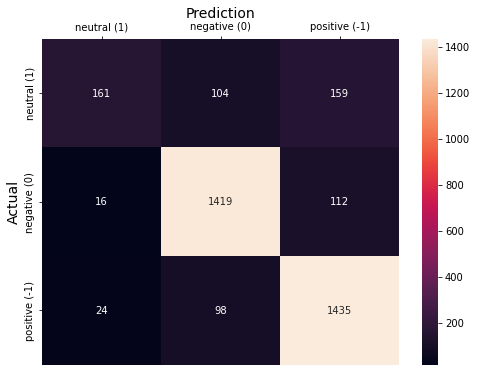

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels([ 'neutral (1)','negative (0)', 'positive (-1)' ])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels([ 'neutral (1)','negative (0)', 'positive (-1)'] )
plt.show()

In [77]:
# Fungsi objektif untuk optimisasi PSO
def objective_function(weights, X_train, y_train, X_test, y_test):
    # Normalisasi bobot
    weights /= np.sum(weights)
    # Melakukan prediksi probabilitas menggunakan masing-masing model dan bobot
    ensemble = (weights[0] * clf.predict_proba(X_train) + weights[1] * model.predict_proba(X_train) + weights[2] * svm.predict_proba(X_train))
    # Menghitung akurasi menggunakan bobot
    y_pred = np.argmax(ensemble, axis=1)
    accuracy = accuracy_score(y_train, y_pred)
    # Mengembalikan nilai negatif akurasi untuk optimisasi maksimum
    return -accuracy

# Membuat objek optimizer PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options)

# Melakukan optimisasi PSO untuk mendapatkan bobot terbaik
best_cost, best_weights = optimizer.optimize(objective_function, iters=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Normalisasi bobot terbaik
best_weights /= np.sum(best_weights)

# Menampilkan bobot terbaik dan akurasi model dengan bobot tersebut
print("Bobot terbaik:", best_weights)

# Implementasi bobot ke model soft voting
ensemble = (best_weights[0] * clf.predict_proba(X_test) + best_weights[1] * model.predict_proba(X_test) + best_weights[2] * svm.predict_proba(X_test))
y_pred = np.argmax(ensemble, axis=1)
print("Akurasi Soft Voting dengan bobot terbaik:", accuracy_score(y_test, y_pred))

2023-03-13 16:34:52,082 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.871
2023-03-13 16:48:05,548 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8712443310657596, best pos: [0.01146574 0.00052344 0.00531636]


Bobot terbaik: [0.66254731 0.03024712 0.30720557]
Akurasi Soft Voting dengan bobot terbaik: 0.8795351473922902


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print("Soft Voting Accuracy: ", accuracy_score(y_test, y_pred))
print("Soft Voting Precision: ", precision_score(y_test, y_pred,  average='weighted'))
print("Soft Voting Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Soft Voting f1_score: ", f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

Soft Voting Accuracy:  0.8795351473922902
Soft Voting Precision:  0.8797580280076881
Soft Voting Recall:  0.8795351473922902
Soft Voting f1_score:  0.8716218557309388
              precision    recall  f1-score   support

           0       0.87      0.47      0.61       424
           1       0.90      0.93      0.91      1547
           2       0.86      0.94      0.90      1557

    accuracy                           0.88      3528
   macro avg       0.88      0.78      0.81      3528
weighted avg       0.88      0.88      0.87      3528



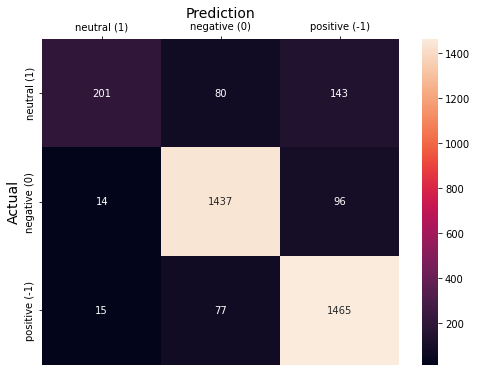

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels([ 'neutral (1)','negative (0)', 'positive (-1)' ])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels([ 'neutral (1)','negative (0)', 'positive (-1)'] )
plt.show()